In [1]:
import httpx  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#" sudo docker run -t -i -p 5000:5000 -v ${PWD}:/data osrm/osrm-backend osrm-routed --algorithm mld /data/new-york-latest.osrm"

In [3]:
osrm_host = 'http://127.0.0.1'
osrm_port = 5000

In [4]:
def get_data(lon_src , lat_src,  lon_dst , lat_dst): 
    try: 
        request_url = f"{osrm_host}:{osrm_port}/route/v1/driving/{lon_src},{lat_src};{lon_dst},{lat_dst}"
        respons = httpx.get(request_url , trust_env=False, timeout=10).json() # prevent using proxy if its Fasle
        best_route= respons['routes'][0]
        duration = best_route['duration']
        distance = best_route['distance']
        return duration ,distance 
    except: 
        return np.nan ,np.nan

In [5]:
duration , distance = get_data(40.71792543422583, 40.77636800029203, 40.7851, -73.9473626995488)
duration , distance  # testing our url and its response

(nan, nan)

In [6]:
data = pd.read_csv("./data/nyc_taxi_data_2014.csv" , low_memory=False)
df = data.sample(frac=.02)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
3608239,VTS,2014-01-29 16:45:00,2014-01-29 16:53:00,6,0.72,-73.992223,40.754027,1,NaN,-73.984873,40.760077,CSH,6.5,1.0,0.5,0.00,0.0,8.00
4628552,VTS,2014-01-02 17:39:00,2014-01-02 17:46:00,2,1.83,-73.978958,40.750695,1,NaN,-73.986847,40.729690,CRD,7.5,1.0,0.5,2.12,0.0,11.12
8181630,VTS,2014-01-08 13:50:00,2014-01-08 14:02:00,1,1.38,-73.960397,40.766092,1,NaN,-73.948520,40.774022,CSH,9.0,0.0,0.5,0.00,0.0,9.50
10772225,VTS,2014-01-18 00:16:00,2014-01-18 00:33:00,3,3.99,-73.971728,40.762970,1,NaN,-74.006447,40.714065,CSH,15.5,0.5,0.5,0.00,0.0,16.50
3577702,VTS,2014-01-29 15:10:00,2014-01-29 15:22:00,2,2.41,-73.971570,40.746575,1,NaN,-73.947370,40.771320,CSH,11.0,0.0,0.5,0.00,0.0,11.50


In [7]:
df.isna().sum() 

vendor_id                  0
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_distance              0
pickup_longitude           0
pickup_latitude            0
rate_code                  0
store_and_fwd_flag    153550
dropoff_longitude          5
dropoff_latitude           5
payment_type               0
fare_amount                0
surcharge                  0
mta_tax                    0
tip_amount                 0
tolls_amount               0
total_amount               0
dtype: int64

In [8]:
df.drop('store_and_fwd_flag' , axis=1 , inplace=True) # this feature is not that important

In [9]:
df.dropna(inplace=True)


In [10]:
df.isna().sum()


vendor_id            0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
rate_code            0
dropoff_longitude    0
dropoff_latitude     0
payment_type         0
fare_amount          0
surcharge            0
mta_tax              0
tip_amount           0
tolls_amount         0
total_amount         0
dtype: int64

In [11]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
3608239,VTS,2014-01-29 16:45:00,2014-01-29 16:53:00,6,0.72,-73.992223,40.754027,1,-73.984873,40.760077,CSH,6.5,1.0,0.5,0.00,0.0,8.00
4628552,VTS,2014-01-02 17:39:00,2014-01-02 17:46:00,2,1.83,-73.978958,40.750695,1,-73.986847,40.729690,CRD,7.5,1.0,0.5,2.12,0.0,11.12
8181630,VTS,2014-01-08 13:50:00,2014-01-08 14:02:00,1,1.38,-73.960397,40.766092,1,-73.948520,40.774022,CSH,9.0,0.0,0.5,0.00,0.0,9.50
10772225,VTS,2014-01-18 00:16:00,2014-01-18 00:33:00,3,3.99,-73.971728,40.762970,1,-74.006447,40.714065,CSH,15.5,0.5,0.5,0.00,0.0,16.50
3577702,VTS,2014-01-29 15:10:00,2014-01-29 15:22:00,2,2.41,-73.971570,40.746575,1,-73.947370,40.771320,CSH,11.0,0.0,0.5,0.00,0.0,11.50


### since making 300k request is too much to handle with Internet of IRAN :() , i had to extract less samples for now 

In [12]:
sample_df = df.sample(frac=.01,  random_state=42).reset_index(drop=True)
sample_df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-01-10 22:39:00,2014-01-10 22:55:00,3,3.10,-73.961307,40.711327,1,-73.966287,40.690527,CSH,12.5,0.5,0.5,0.0,0.0,13.5
1,CMT,2014-02-08 23:36:38,2014-02-09 00:08:35,1,8.50,-73.992040,40.753969,1,-73.877223,40.725891,CSH,28.5,0.5,0.5,0.0,0.0,29.5
2,VTS,2014-02-09 17:06:00,2014-02-09 17:18:00,1,1.70,-73.975318,40.762282,1,-73.988710,40.748882,CSH,9.5,0.0,0.5,0.0,0.0,10.0
3,CMT,2014-01-01 12:29:01,2014-01-01 12:34:05,2,0.80,-73.990599,40.724706,1,-73.996751,40.715259,CRD,5.5,0.0,0.5,1.0,0.0,7.0
4,CMT,2014-02-11 12:43:34,2014-02-11 13:05:40,2,2.70,-73.959722,40.771278,1,-73.987166,40.748663,CRD,15.5,0.0,0.5,1.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,CMT,2014-01-25 15:10:59,2014-01-25 15:27:24,2,1.90,-73.998102,40.716757,1,-73.990208,40.733656,CRD,11.5,0.0,0.5,2.0,0.0,14.0
2996,VTS,2014-02-06 15:15:00,2014-02-06 15:45:00,1,3.44,-73.974230,40.763187,1,-74.007637,40.741922,CRD,20.5,0.0,0.5,2.0,0.0,23.0
2997,CMT,2014-01-10 16:44:08,2014-01-10 16:47:06,1,0.50,-73.953427,40.719878,1,-73.957722,40.714504,CSH,4.0,1.0,0.5,0.0,0.0,5.5
2998,CMT,2014-01-27 11:52:12,2014-01-27 12:01:18,1,0.60,-73.972634,40.755357,1,-73.981932,40.756492,CRD,7.0,0.0,0.5,1.5,0.0,9.0


### lets create two features , one for distance traveled , and one for trip duration with help of OSRM

In [14]:
OSRM_df = sample_df.apply(lambda x :pd.Series(get_data(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude'])), axis=1)

In [15]:
OSRM_df.columns = ['OSRM_duration' , 'OSRM_distance']
OSRM_df

,OSRM_duration,OSRM_distance
0,329.5,3053.7
1,952.2,12433.2
2,307.2,2487.9
3,189.2,1305.5
4,522.6,4275.1
...,...,...
2995,296.3,2114.2
2996,535.4,5010.5
2997,134.2,1157.8
2998,142.2,1367.7


In [16]:
df = pd.concat([sample_df , OSRM_df], axis=1)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,OSRM_duration,OSRM_distance
0,VTS,2014-01-10 22:39:00,2014-01-10 22:55:00,3,3.1,-73.961307,40.711327,1,-73.966287,40.690527,CSH,12.5,0.5,0.5,0.0,0.0,13.5,329.5,3053.7
1,CMT,2014-02-08 23:36:38,2014-02-09 00:08:35,1,8.5,-73.992040,40.753969,1,-73.877223,40.725891,CSH,28.5,0.5,0.5,0.0,0.0,29.5,952.2,12433.2
2,VTS,2014-02-09 17:06:00,2014-02-09 17:18:00,1,1.7,-73.975318,40.762282,1,-73.988710,40.748882,CSH,9.5,0.0,0.5,0.0,0.0,10.0,307.2,2487.9
3,CMT,2014-01-01 12:29:01,2014-01-01 12:34:05,2,0.8,-73.990599,40.724706,1,-73.996751,40.715259,CRD,5.5,0.0,0.5,1.0,0.0,7.0,189.2,1305.5
4,CMT,2014-02-11 12:43:34,2014-02-11 13:05:40,2,2.7,-73.959722,40.771278,1,-73.987166,40.748663,CRD,15.5,0.0,0.5,1.0,0.0,17.0,522.6,4275.1


### lets create some feature that might be usefull and affect our target like holidays , weekends and rush hours 


In [17]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['is_weekend'] = df['pickup_datetime'].dt.weekday.apply(lambda x : 1 if x>5 else 0)
df['is_rush_hour'] = df['pickup_datetime'].dt.hour.apply(lambda x : 1 if x in [7, 8,9 , 17, 18, 19] else 0)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,...,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,OSRM_duration,OSRM_distance,is_weekend,is_rush_hour
0,VTS,2014-01-10 22:39:00,2014-01-10 22:55:00,3,3.1,-73.961307,40.711327,1,-73.966287,40.690527,...,12.5,0.5,0.5,0.0,0.0,13.5,329.5,3053.7,0,0
1,CMT,2014-02-08 23:36:38,2014-02-09 00:08:35,1,8.5,-73.992040,40.753969,1,-73.877223,40.725891,...,28.5,0.5,0.5,0.0,0.0,29.5,952.2,12433.2,0,0
2,VTS,2014-02-09 17:06:00,2014-02-09 17:18:00,1,1.7,-73.975318,40.762282,1,-73.988710,40.748882,...,9.5,0.0,0.5,0.0,0.0,10.0,307.2,2487.9,1,1
3,CMT,2014-01-01 12:29:01,2014-01-01 12:34:05,2,0.8,-73.990599,40.724706,1,-73.996751,40.715259,...,5.5,0.0,0.5,1.0,0.0,7.0,189.2,1305.5,0,0
4,CMT,2014-02-11 12:43:34,2014-02-11 13:05:40,2,2.7,-73.959722,40.771278,1,-73.987166,40.748663,...,15.5,0.0,0.5,1.0,0.0,17.0,522.6,4275.1,0,0


In [18]:
target_df = df[['OSRM_duration']]
train_df = df.drop(['OSRM_duration'], axis=1)

#### lets keep numerical columns 


In [19]:
train_df = train_df.select_dtypes(include=[int , float])

In [20]:
train_df

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,OSRM_distance,is_weekend,is_rush_hour
0,3,3.10,-73.961307,40.711327,1,-73.966287,40.690527,12.5,0.5,0.5,0.0,0.0,13.5,3053.7,0,0
1,1,8.50,-73.992040,40.753969,1,-73.877223,40.725891,28.5,0.5,0.5,0.0,0.0,29.5,12433.2,0,0
2,1,1.70,-73.975318,40.762282,1,-73.988710,40.748882,9.5,0.0,0.5,0.0,0.0,10.0,2487.9,1,1
3,2,0.80,-73.990599,40.724706,1,-73.996751,40.715259,5.5,0.0,0.5,1.0,0.0,7.0,1305.5,0,0
4,2,2.70,-73.959722,40.771278,1,-73.987166,40.748663,15.5,0.0,0.5,1.0,0.0,17.0,4275.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2,1.90,-73.998102,40.716757,1,-73.990208,40.733656,11.5,0.0,0.5,2.0,0.0,14.0,2114.2,0,0
2996,1,3.44,-73.974230,40.763187,1,-74.007637,40.741922,20.5,0.0,0.5,2.0,0.0,23.0,5010.5,0,0
2997,1,0.50,-73.953427,40.719878,1,-73.957722,40.714504,4.0,1.0,0.5,0.0,0.0,5.5,1157.8,0,0
2998,1,0.60,-73.972634,40.755357,1,-73.981932,40.756492,7.0,0.0,0.5,1.5,0.0,9.0,1367.7,0,0


### with sklearn feature selection  , i decided to select some highly correlated features with our target

#### pionts to consider , feature selection in sklearn might not choose boolean type (0 ,1) in our model becuase it doesn't have trend that alighns with target , we have to add it manaully sometimes


In [21]:
from sklearn.feature_selection import SelectKBest , f_classif

selector_duration = SelectKBest(score_func=f_classif, k=7)
selector_distance = SelectKBest(score_func=f_classif, k=7)

selected_duration =selector_duration.fit(train_df, target_df)  

selected_features = train_df.columns[selected_duration.get_support()] 
# logical or says if one of them is True keep for both but if both is false , ignore it 

selected_train_df = train_df[selected_features]
selected_train_df 

/home/alchemist-linux/Desktop/Docker OSRM_textTravel_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,OSRM_distance
0,3,3.10,12.5,0.0,0.0,13.5,3053.7
1,1,8.50,28.5,0.0,0.0,29.5,12433.2
2,1,1.70,9.5,0.0,0.0,10.0,2487.9
3,2,0.80,5.5,1.0,0.0,7.0,1305.5
4,2,2.70,15.5,1.0,0.0,17.0,4275.1
...,...,...,...,...,...,...,...
2995,2,1.90,11.5,2.0,0.0,14.0,2114.2
2996,1,3.44,20.5,2.0,0.0,23.0,5010.5
2997,1,0.50,4.0,0.0,0.0,5.5,1157.8
2998,1,0.60,7.0,1.5,0.0,9.0,1367.7


In [22]:
cstd = selected_train_df.copy()
cstd[['is_weekend' , 'is_rush_hour']] = train_df[['is_weekend' , 'is_rush_hour']]
train_df = cstd 
train_df

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,OSRM_distance,is_weekend,is_rush_hour
0,3,3.10,12.5,0.0,0.0,13.5,3053.7,0,0
1,1,8.50,28.5,0.0,0.0,29.5,12433.2,0,0
2,1,1.70,9.5,0.0,0.0,10.0,2487.9,1,1
3,2,0.80,5.5,1.0,0.0,7.0,1305.5,0,0
4,2,2.70,15.5,1.0,0.0,17.0,4275.1,0,0
...,...,...,...,...,...,...,...,...,...
2995,2,1.90,11.5,2.0,0.0,14.0,2114.2,0,0
2996,1,3.44,20.5,2.0,0.0,23.0,5010.5,0,0
2997,1,0.50,4.0,0.0,0.0,5.5,1157.8,0,0
2998,1,0.60,7.0,1.5,0.0,9.0,1367.7,0,0


In [23]:
whole_df = pd.concat([train_df , target_df], axis=1)
whole_df

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,OSRM_distance,is_weekend,is_rush_hour,OSRM_duration
0,3,3.10,12.5,0.0,0.0,13.5,3053.7,0,0,329.5
1,1,8.50,28.5,0.0,0.0,29.5,12433.2,0,0,952.2
2,1,1.70,9.5,0.0,0.0,10.0,2487.9,1,1,307.2
3,2,0.80,5.5,1.0,0.0,7.0,1305.5,0,0,189.2
4,2,2.70,15.5,1.0,0.0,17.0,4275.1,0,0,522.6
...,...,...,...,...,...,...,...,...,...,...
2995,2,1.90,11.5,2.0,0.0,14.0,2114.2,0,0,296.3
2996,1,3.44,20.5,2.0,0.0,23.0,5010.5,0,0,535.4
2997,1,0.50,4.0,0.0,0.0,5.5,1157.8,0,0,134.2
2998,1,0.60,7.0,1.5,0.0,9.0,1367.7,0,0,142.2


In [24]:
target_df

,OSRM_duration
0,329.5
1,952.2
2,307.2
3,189.2
4,522.6
...,...
2995,296.3
2996,535.4
2997,134.2
2998,142.2


In [25]:
target_corr =whole_df.corr()['OSRM_duration']
target_corr = pd.DataFrame(target_corr.drop(['OSRM_duration' ,'is_weekend' , 'is_rush_hour']))
# i just wanted to see target correlation with other features not themselves to themselves and also not for boolean values

Text(0.5, 1.0, 'rush hour travels count and average duration')

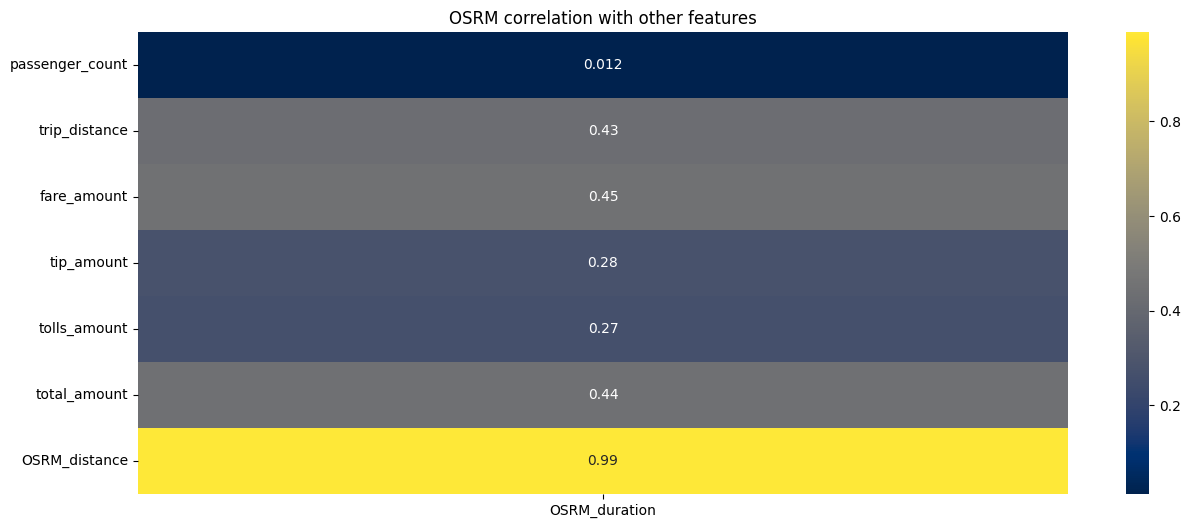

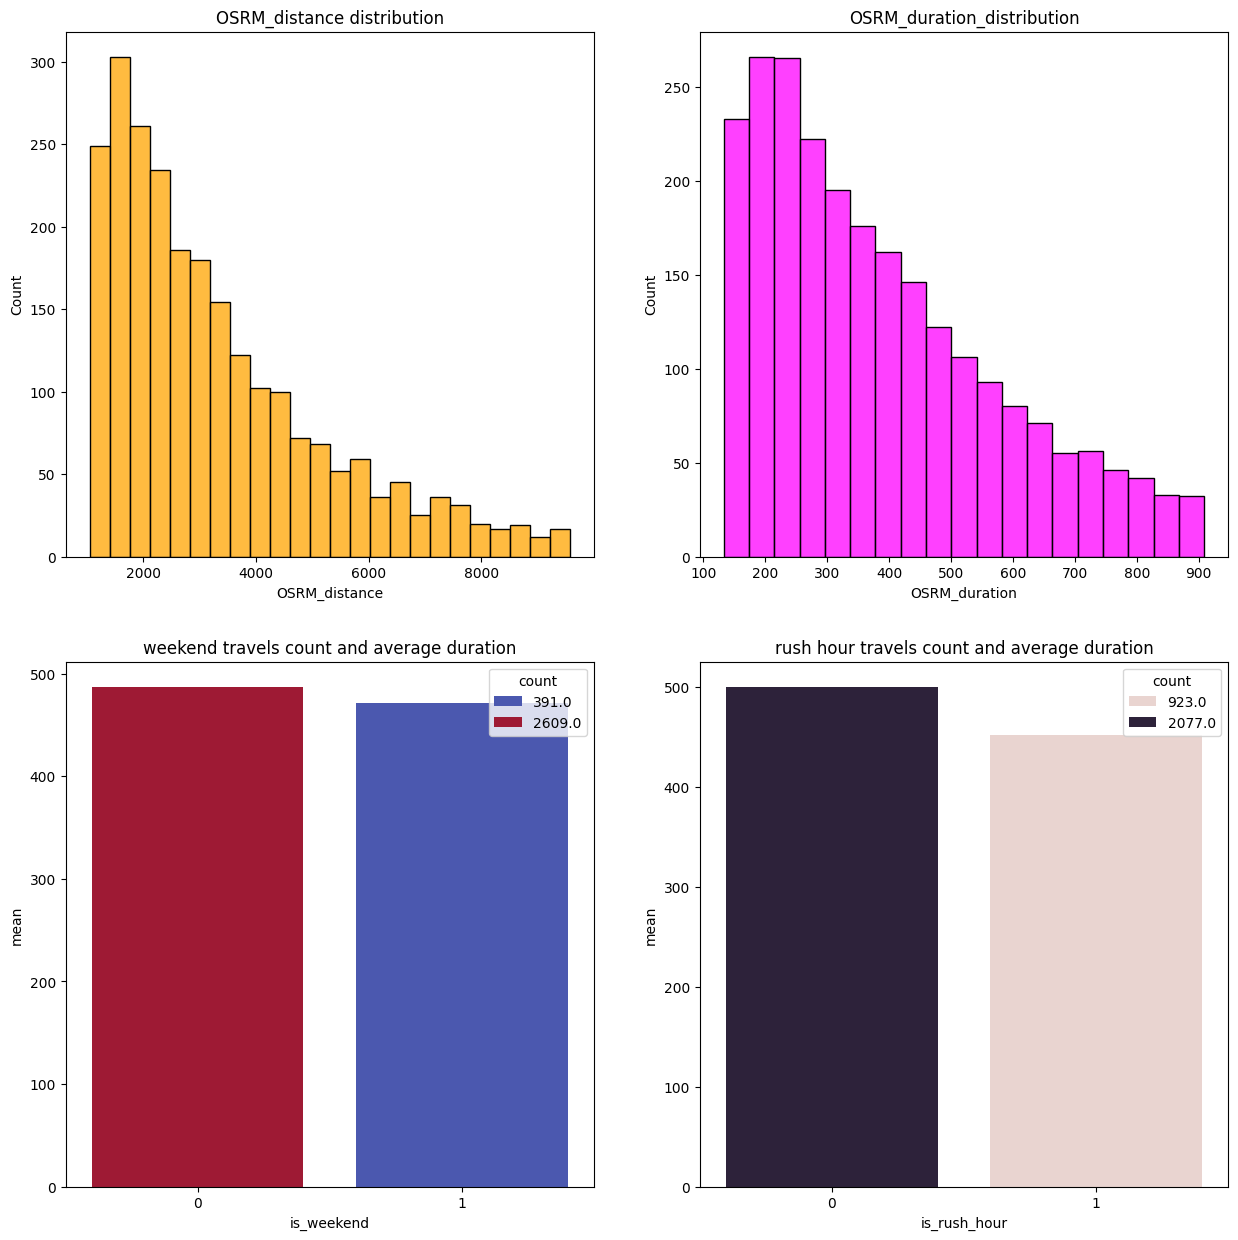

In [50]:
fig2, ax2 = plt.subplots(figsize = (15, 6))
sns.heatmap(pd.DataFrame(target_corr)
,  annot=True, cmap='cividis' , ax=ax2)
ax2.set_title('OSRM correlation with other features')


fig ,axes = plt.subplots(2, 2 , figsize=(15, 15)) 

top_threshold = target_df['OSRM_duration'].quantile(0.90)
bottom_threshold = target_df['OSRM_duration'].quantile(0.10)

clean_target_df = target_df[(target_df['OSRM_duration'].between(bottom_threshold , top_threshold))]
# i decided to remove outlier to see the distribution of data without outliers

top_distance_threshold = whole_df['OSRM_distance'].quantile(0.90)
bottom_distance_threshold = whole_df['OSRM_distance'].quantile(0.10)

clean_distance_df = whole_df[whole_df['OSRM_distance'].between(bottom_distance_threshold,top_distance_threshold)]
sns.histplot(clean_distance_df['OSRM_distance'], ax=axes[0, 0], color='orange')
axes[0,0].set_title('OSRM_distance distribution')

sns.histplot(clean_target_df['OSRM_duration'], ax=axes[0, 1] , color='magenta')
axes[0,1].set_title('OSRM_duration_distribution')

weekend_group = df.groupby("is_weekend")["OSRM_duration"].describe()
weekend_df = weekend_group.reset_index()
sns.barplot(x ='is_weekend', y='mean', hue='count', data=weekend_df , palette='coolwarm' , ax=axes[1, 0])
axes[1,0].set_title('weekend travels count and average duration')


rush_group = df.groupby('is_rush_hour')['OSRM_duration'].describe()
rush_group_df = rush_group.reset_index()
sns.barplot(x='is_rush_hour', y='mean' , hue='count', ax=axes[1, 1], data=rush_group_df)
axes[1,1].set_title('rush hour travels count and average duration')


#### as we can see even the count of trips is significantly lower in rush hours and weeekend compare to all days but mean duration is keeping up , telling that time duration in weekend and rush hours are high and also high correlation between travel distance and travel duration of OSRM is extremaly positive and other features like fare amound and etc.. are more moderate 

np.int64(599)

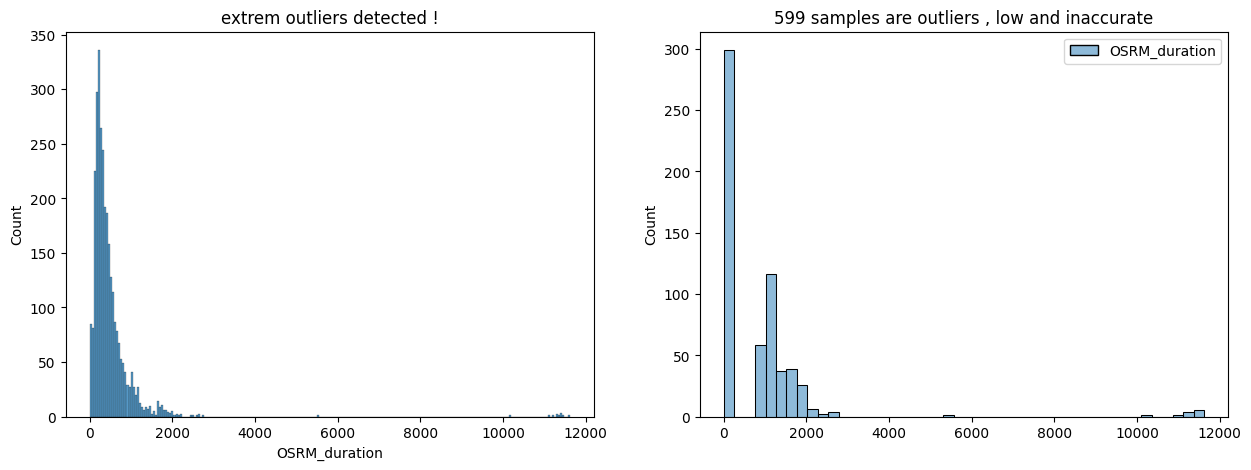

In [ ]:
# lets check out our outliers 

fig ,axes  = plt.subplots(1, 2 , figsize=(15, 5))
sns.histplot(target_df['OSRM_duration'] , ax = axes[0])
axes[0].set_title('extrem outliers detected !')


data=target_df[(target_df['OSRM_duration'] < bottom_threshold) | 
                             (target_df['OSRM_duration'] > top_threshold)]

sns.histplot(data , ax=axes[1])
axes[1].set_title(f'{data.count().tolist()[0]} samples are outliers , low and inaccurate')

##### base what i detected , extream outliser how zero values or overl numbered , so i decided to use clean data for training instead of normalizing all of the outliers too , i might get better result focusing on main centered data instead of all outliers 

# lets bulid our model

In [ ]:
import tensorflow as tf 
from tensorflow import keras 
from keras import layers 
train_shape  = train_df.shape

model = layers.Input(shape=train_shape[1])
model = layers.Dense(32 , activation='relu')(model)
model = layers.Dropout()
model = layers.Dense(16 , activation='relu')(model)

